In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-62.493283930818905 54.28554058954444
-64.23324384696144 -92.61715518293187
9.692518458618778 -92.01903812466118
-80.51526793829547 70.02287073511431
28.1636087173934 147.57648488071118
35.07037224974928 -120.46627932340348
41.73837967965977 -124.3806210151233
-19.907752184466787 62.774861340668
-60.59450746522694 5.114101659164447
9.525679982442043 99.56524114522557
-73.87758756626495 -134.666132220239
22.359853012119714 -30.224327175665593
-37.225975682985805 61.11845877743181
80.08908352672708 95.18162465976559
-62.92099301046103 -66.0123123837942
-89.52625581476966 -144.63139714238923
-83.84315044278678 -63.923155257255644
71.78929252829073 -169.2892774277642
46.126116154315326 136.02537982518203
8.942386162327281 -58.74386037232557
-42.71267911824208 -80.81261411970121
-38.225143036832016 147.18991913508665
71.90859361394178 123.2394643022908
-21.49596863096329 -127.82205454988582
28.038139888353015 74.84504383085061
-85.45684221224224 25.19626983436504
43.083660623564555 -19.7435

72.18790978689643 -139.82042704042482
83.70512989745049 45.122633039748735
-51.40540074193299 -24.125630218055193
-33.892690338362364 -146.04979507129275
-9.962818268978012 -145.94419878925328
21.76773027967654 -105.80192026712942
77.71188545217393 -135.02899613658593
39.45217278066809 155.85389205882228
50.988370452837074 -69.21968689156594
53.28837474992008 71.45626945847096
-50.11114925847823 -46.57196241177894
-32.387861679180276 -60.34000886762321
-76.8453793642397 -95.45575941714685
72.76655169340575 92.74206890236707
82.21920927786607 -41.800920945776426
44.28721085830597 26.162697357704275
64.24745916595572 31.38575229595918
-65.12489902847601 122.05697829823993
-80.46000415680615 -71.42220642492819
-4.126344466562941 -165.571630092336
-50.99858029367244 -160.3060958269152
-35.506601591569414 -103.33121849297835
32.09323797398332 -175.1982729118826
45.17998211331937 -84.57216435641377
74.61624295929093 -131.91754069525732
-18.16165642701108 167.4002756680029
-9.035883016996138 

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the datetime module using the following code.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete:
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | san jose
Processing Record 4 of Set 1 | katsuura
Processing Record 5 of Set 1 | santa maria
Processing Record 6 of Set 1 | arcata
Processing Record 7 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | don sak
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | lavrentiya
Processing Record 17 of Set 1 | vostok
Processing Record 18 of Set 1 | mabaruma
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | sale
Processing Record 21 of Set 1 | zhigansk
Processing Record 22 of Set 1 | fatehpur
Processing Record 23 of Set 1 |

Processing Record 41 of Set 4 | baghdogra
Processing Record 42 of Set 4 | kavaratti
Processing Record 43 of Set 4 | scottsburgh
City not found. Skipping...
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | zhanatas
City not found. Skipping...
Processing Record 46 of Set 4 | tuktoyaktuk
Processing Record 47 of Set 4 | chifeng
Processing Record 48 of Set 4 | szentkiraly
Processing Record 49 of Set 4 | isla mujeres
Processing Record 50 of Set 4 | cascais
Processing Record 1 of Set 5 | richards bay
Processing Record 2 of Set 5 | tasbuget
City not found. Skipping...
Processing Record 3 of Set 5 | bengkulu
Processing Record 4 of Set 5 | torres
Processing Record 5 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 5 | souillac
Processing Record 7 of Set 5 | mezen
Processing Record 8 of Set 5 | ust-nera
Processing Record 9 of Set 5 | opuwo
Processing Record 10 of Set 5 | arona
Processing Record 11 of Set 5 | vaitape
Processing Record 12 of Se

Processing Record 27 of Set 8 | kondinskoye
Processing Record 28 of Set 8 | luanda
Processing Record 29 of Set 8 | camacha
Processing Record 30 of Set 8 | humaita
Processing Record 31 of Set 8 | itatinga
Processing Record 32 of Set 8 | sao joao da barra
Processing Record 33 of Set 8 | caravelas
Processing Record 34 of Set 8 | chokurdakh
Processing Record 35 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 36 of Set 8 | namibe
Processing Record 37 of Set 8 | thinadhoo
Processing Record 38 of Set 8 | bereda
Processing Record 39 of Set 8 | chiang khong
Processing Record 40 of Set 8 | cockburn town
Processing Record 41 of Set 8 | lagoa
Processing Record 42 of Set 8 | fort smith
Processing Record 43 of Set 8 | amga
Processing Record 44 of Set 8 | isla vista
Processing Record 45 of Set 8 | novyy urengoy
Processing Record 46 of Set 8 | finschhafen
Processing Record 47 of Set 8 | celestun
Processing Record 48 of Set 8 | malakal
Processing Record 49 of Set 8 | morehead
Proces

Processing Record 14 of Set 12 | sulangan
Processing Record 15 of Set 12 | ewa beach
Processing Record 16 of Set 12 | paracuru
Processing Record 17 of Set 12 | sauda
Processing Record 18 of Set 12 | ngerengere
Processing Record 19 of Set 12 | henties bay
Processing Record 20 of Set 12 | kanye
Processing Record 21 of Set 12 | guilin
Processing Record 22 of Set 12 | puerto narino
Processing Record 23 of Set 12 | mount isa
Processing Record 24 of Set 12 | qui nhon
Processing Record 25 of Set 12 | talara
Processing Record 26 of Set 12 | micheweni
Processing Record 27 of Set 12 | poya
Processing Record 28 of Set 12 | mvuma
Processing Record 29 of Set 12 | chicama
Processing Record 30 of Set 12 | port-cartier
Processing Record 31 of Set 12 | jabinyanah
Processing Record 32 of Set 12 | makakilo city
Processing Record 33 of Set 12 | suntar
Processing Record 34 of Set 12 | fairbanks
Processing Record 35 of Set 12 | de aar
Processing Record 36 of Set 12 | pucallpa
Processing Record 37 of Set 12 

In [12]:
len(city_data)

578

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,35.71,87,90,8.34,CL,2021-06-06 02:05:38
1,San Jose,37.3394,-121.8950,80.76,49,75,5.99,US,2021-06-06 02:05:00
2,Katsuura,35.1333,140.3000,69.91,93,100,12.24,JP,2021-06-06 02:05:38
3,Santa Maria,-29.6842,-53.8069,61.25,97,100,5.10,BR,2021-06-06 02:05:39
4,Arcata,40.8665,-124.0828,60.21,70,1,4.00,US,2021-06-06 02:05:39
5,Hermanus,-34.4187,19.2345,60.91,43,7,8.50,ZA,2021-06-06 02:04:56
6,Don Sak,9.3168,99.6918,85.06,72,100,14.70,TH,2021-06-06 02:05:40
7,Rikitea,-23.1203,-134.9692,76.23,80,54,12.57,PF,2021-06-06 02:05:40
8,Ponta Do Sol,32.6667,-17.1000,67.01,74,54,4.72,PT,2021-06-06 02:03:31
9,Saint-Philippe,-21.3585,55.7679,72.48,85,55,2.64,RE,2021-06-06 02:05:41


In [14]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign a new order to city_data DataFrame.
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-06-06 02:05:38,-53.1500,-70.9167,35.71,87,90,8.34
1,San Jose,US,2021-06-06 02:05:00,37.3394,-121.8950,80.76,49,75,5.99
2,Katsuura,JP,2021-06-06 02:05:38,35.1333,140.3000,69.91,93,100,12.24
3,Santa Maria,BR,2021-06-06 02:05:39,-29.6842,-53.8069,61.25,97,100,5.10
4,Arcata,US,2021-06-06 02:05:39,40.8665,-124.0828,60.21,70,1,4.00
5,Hermanus,ZA,2021-06-06 02:04:56,-34.4187,19.2345,60.91,43,7,8.50
6,Don Sak,TH,2021-06-06 02:05:40,9.3168,99.6918,85.06,72,100,14.70
7,Rikitea,PF,2021-06-06 02:05:40,-23.1203,-134.9692,76.23,80,54,12.57
8,Ponta Do Sol,PT,2021-06-06 02:03:31,32.6667,-17.1000,67.01,74,54,4.72
9,Saint-Philippe,RE,2021-06-06 02:05:41,-21.3585,55.7679,72.48,85,55,2.64


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the city_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

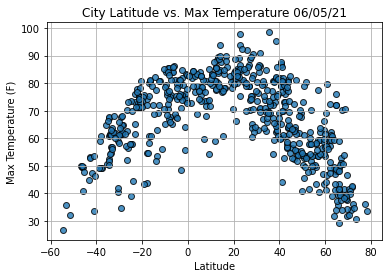

In [19]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

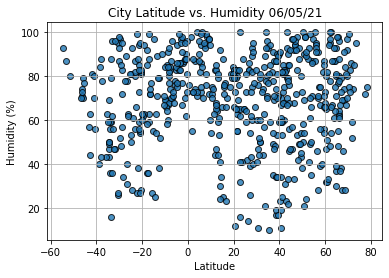

In [21]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

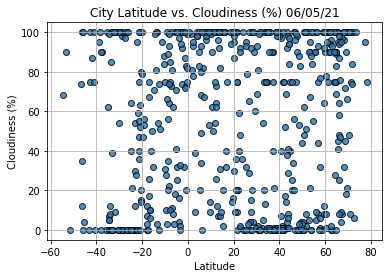

In [22]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

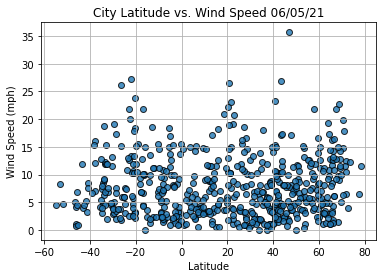

In [23]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()